In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
size_plot = 24 * 1.5

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()
system_matrix_size_home = system_matrix_size[0:1]
home_full = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_home_pc", system_matrix_size_home,"full")
home_allocation = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_home_pc", system_matrix_size_home,"allocation")
home_transfer = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_home_pc", system_matrix_size_home,"transfer")

server_full = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_server", system_matrix_size,"full")
server_allocation = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_server", system_matrix_size,"allocation")
server_transfer = load_cpu_stats_from_files_pînned_2("other/transfer_with_pinned_multi_partialy_server", system_matrix_size,"transfer")

system_matrix_size_home_GiB = system_matrix_size_home/ 1e9  * 16
system_matrix_size_GiB = system_matrix_size / 1e9  * 16

In [3]:
print(system_matrix_size_GiB)
print(server_allocation)

[ 3.05853242  7.46634246 10.9311207  15.48133178 19.21883142 23.59541766]
(array([0.07267216, 0.51411807, 0.74134711, 1.11459201, 1.38744297,
       1.56092503]), array([0.04235061, 0.11082428, 0.17907228, 0.70538015, 0.95540544,
       1.24078545]), array([0.59995896, 1.0571651 , 1.41183027, 2.28691303, 2.71030957,
       3.43408386]), array([0.09744542, 0.22523786, 0.27353449, 0.32222639, 0.4002928 ,
       0.40789376]))


In [4]:
print(server_full[0])

[0.39181719 0.9063399  1.26213291 1.90092801 2.27872173 3.43736323]


C:\Users\Ian\AppData\Local\Temp\ipykernel_24384\3382149936.py:58: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


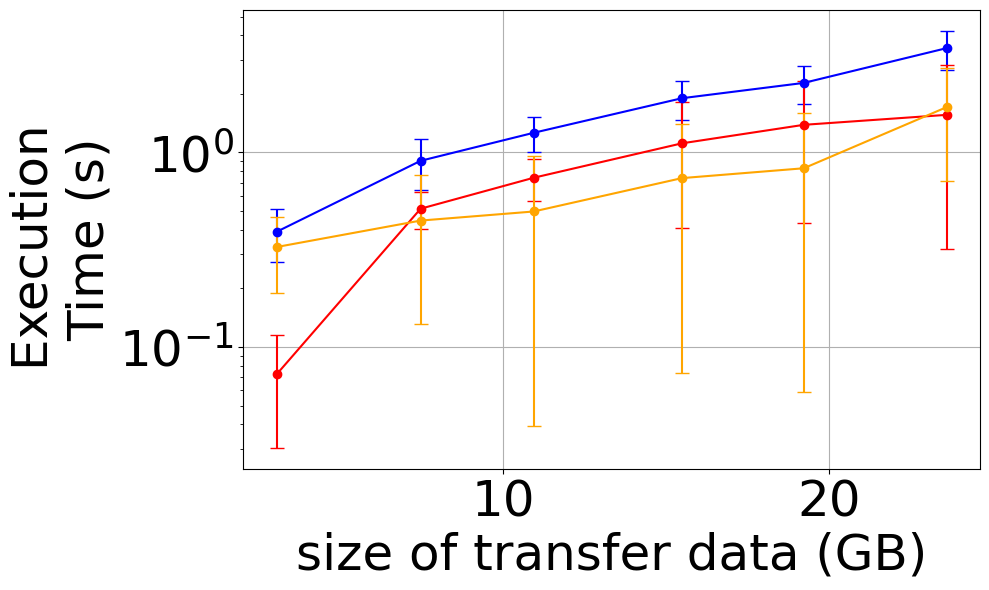

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CPU with error bars
# ax.errorbar(
#     system_matrix_size_home_GiB, home_full[0], yerr=home_full[1],
#     marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
# )

# ax.errorbar(
#     system_matrix_size_home_GiB, home_allocation[0], yerr=home_allocation[1],
#     marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
# )

# ax.errorbar(
#     system_matrix_size_home_GiB, home_transfer[0], yerr=home_transfer[1],
#     marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
# )


ax.errorbar(
    system_matrix_size_GiB, server_full[0], yerr=server_full[3],
    marker='o', label='server_full', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    system_matrix_size_GiB, server_allocation[0], yerr=server_allocation[1],
    marker='o', label='server_allocation', color='red', capsize=5, linestyle='-'
)

ax.errorbar(
    system_matrix_size_GiB, server_transfer[0], yerr=server_transfer[1],
    marker='o', label='server_transfer', color='orange', capsize=5, linestyle='-'
)

# Plot GPU with error bars
# ax.errorbar(
#     system_matrix_size_GiB, server_median, yerr=server_std,
#     marker='o', label='server', color='orange', capsize=5, linestyle='-'
# )

ax.set_xlabel('size of transfer data (GB)', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')

fig.canvas.draw()
ax.xaxis.offsetText.set_fontsize(size_plot)
ax.yaxis.offsetText.set_fontsize(size_plot)


offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/time_to_transfer_data_with_pinned_part_multi.svg", format='svg')
plt.show()

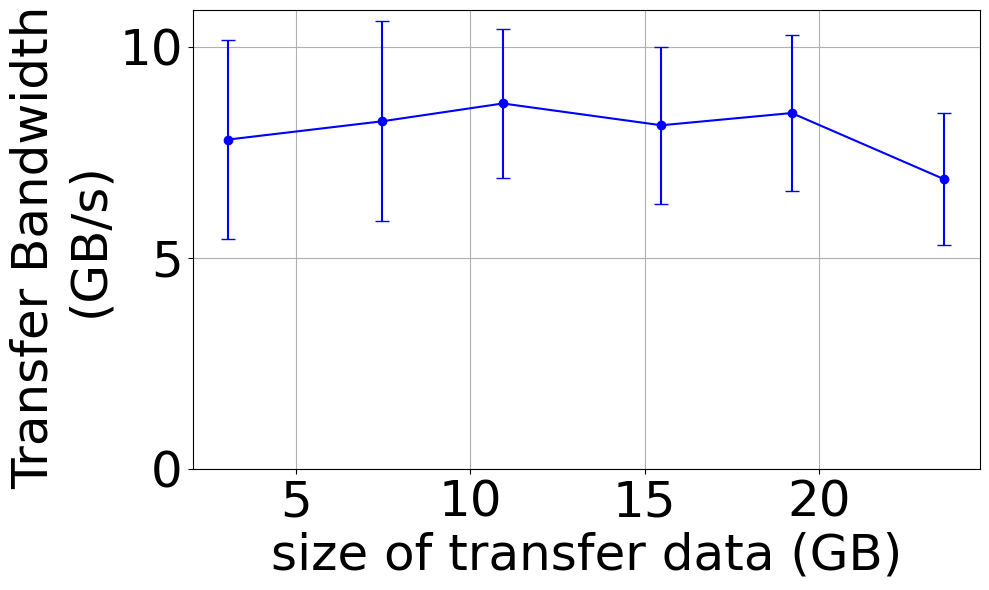

In [6]:
import numpy as np



# Compute bandwidth and error

server_bandwidth = np.array(system_matrix_size_GiB) / server_full[0]
server_bandwidth_err = np.array(system_matrix_size_GiB) * server_full[3] / (server_full[0] ** 2)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    system_matrix_size_GiB, server_bandwidth, yerr=server_bandwidth_err,
    marker='o', label='server', color='blue', capsize=5, linestyle='-'
)

ax.set_xlabel('size of transfer data (GB)', fontsize=size_plot)
ax.set_ylabel('Transfer Bandwidth \n(GB/s)', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('linear')  # Likely more appropriate for bandwidth

fig.canvas.draw()
# ax.xaxis.offsetText.set_fontsize(size_plot)
# ax.yaxis.offsetText.set_fontsize(size_plot)

offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/transfer_bandwidth_with_pinned_part_multi.svg", format='svg')
plt.show()
